In [24]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

In [25]:
data_RO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_sea.csv')
data_RO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_nacl.csv')
data_RO_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_simple.csv')
data_RO_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_reaktoro.csv')

In [26]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple.csv')
data_MVC_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_reaktoro.csv')

In [27]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Membrane Area" , "Operating Pressure"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_seawater[i]) / data_RO_reaktoro[i]) * 100
    error_nacl[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_nacl[i]) / data_RO_reaktoro[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_simple[i]) / data_RO_reaktoro[i]) * 100

In [28]:
# Sea errors
for i in results_col:
    print(i)
    print(np.mean(error_sea[i]))

LCOW
0.13456602725622283
SEC
0.13468496515448572
Membrane Area
0.17095051804399686
Operating Pressure
0.04237329677151634


In [29]:
# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl[i]))

LCOW
6.114595346079309
SEC
7.133074598354335
Membrane Area
0.1095537137072952
Operating Pressure
6.995218460460391


In [31]:
sea_color = "#FFD046"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#C73E1D"

title_size = 14
plt.rcParams.update({'font.size': 14})

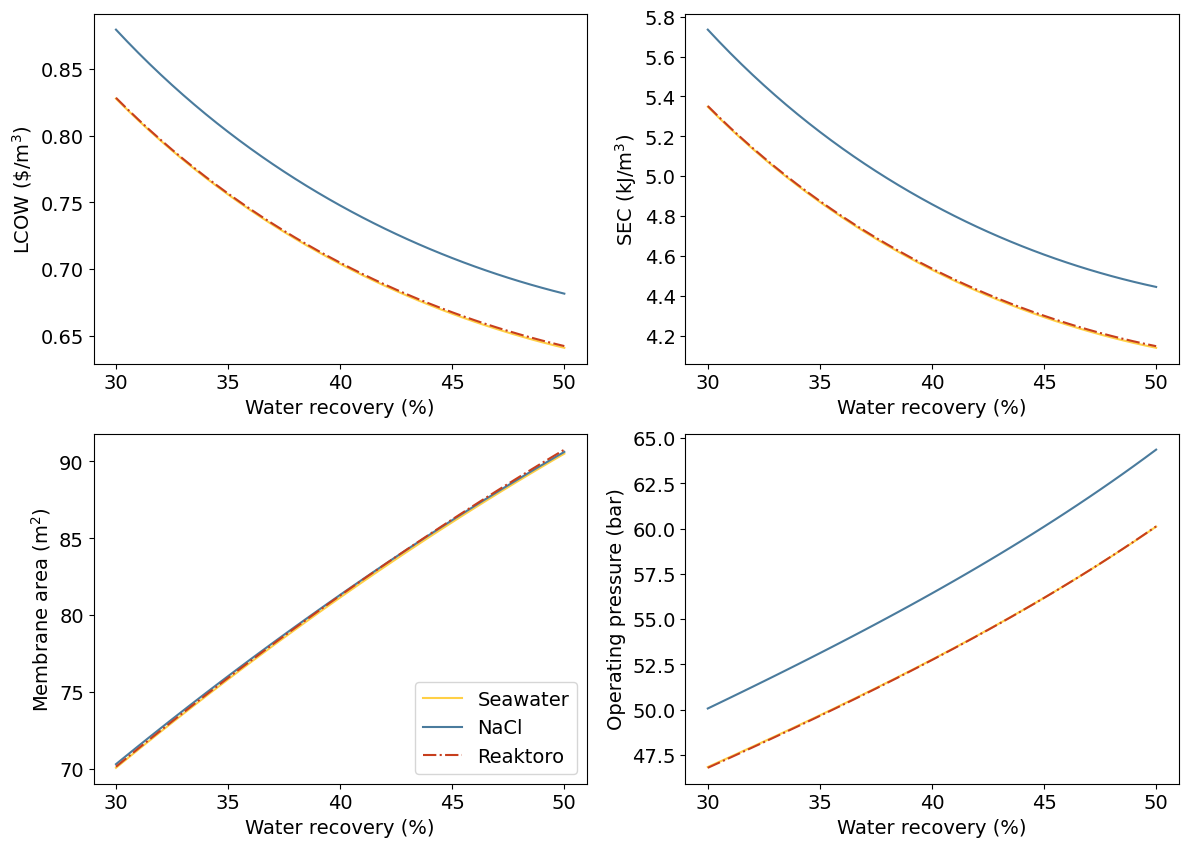

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4)) #figsize=(3.5, 2.5)

axs[0,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], color=nacl_color)
# axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
axs[0,0].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['LCOW'], "-.", color=reaktoro_color)
axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)

axs[0,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['SEC'], color=nacl_color)
# axs[0,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['SEC'], color=simple_color)
axs[0,1].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['SEC'], "-.", color=reaktoro_color)
axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Membrane Area'], color=sea_color)
axs[1,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Membrane Area'], color=nacl_color)
# axs[1,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Membrane Area'], color=simple_color)
axs[1,0].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['Membrane Area'], "-.", color=reaktoro_color)
axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Membrane area (m$^{2}$)", fontsize=title_size)

axs[1,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Operating Pressure']/1e5, color=sea_color)
axs[1,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
# axs[1,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Operating Pressure']/1e5, color=simple_color)
axs[1,1].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['Operating Pressure']/1e5, "-.", color=reaktoro_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Operating pressure (bar)", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Reaktoro"], loc="lower right", fontsize=title_size)

fig.savefig("RO_comparison")


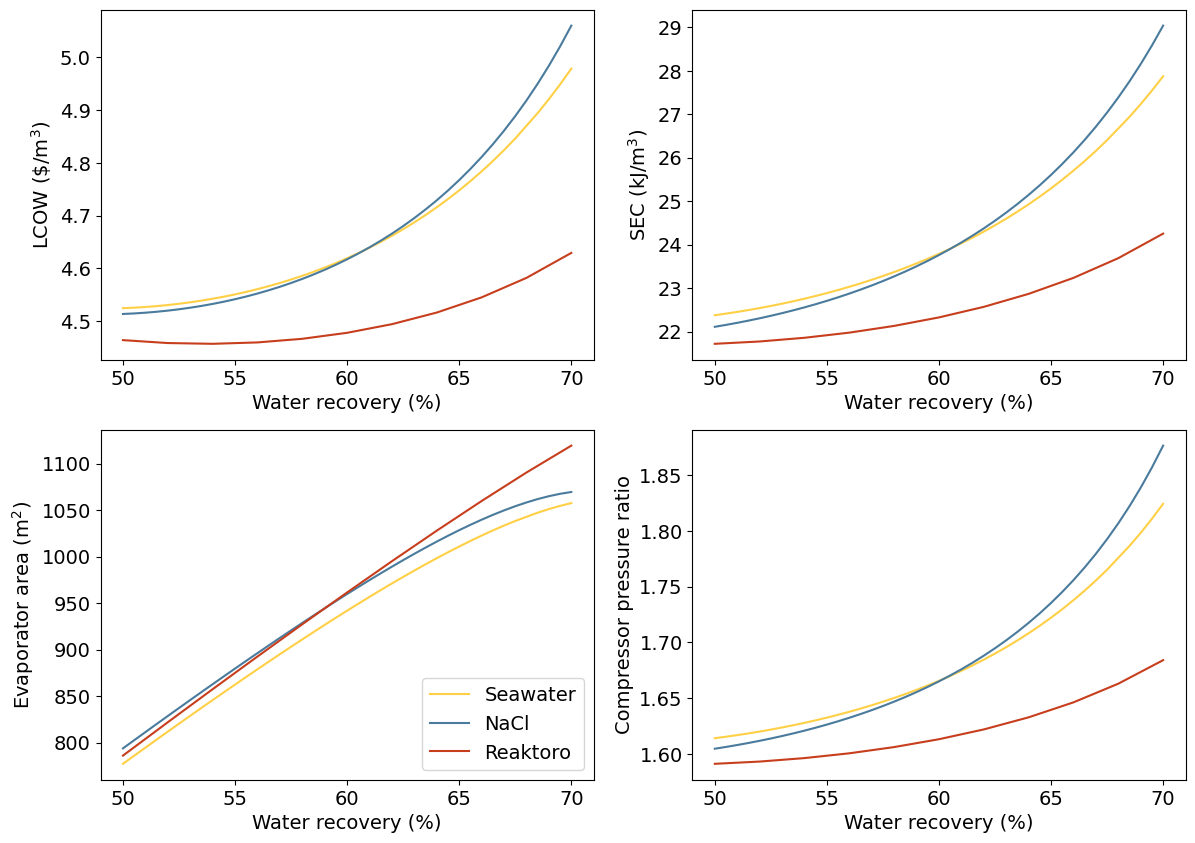

In [33]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4))


axs[0,0].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['LCOW'], color=nacl_color)
axs[0,0].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['LCOW'], color=reaktoro_color)
# axs[0,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['LCOW'], color=simple_color)

axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)


axs[0,1].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['SEC'], color=nacl_color)
axs[0,1].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['SEC'], color=reaktoro_color)
# axs[0,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['SEC'], color=simple_color)

axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Evaporator area'], color=sea_color)
axs[1,0].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Evaporator area'], color=nacl_color)
axs[1,0].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Evaporator area'], color=reaktoro_color)
# axs[1,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Evaporator area'], color=simple_color)

axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)

axs[1,1].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Compressor pressure ratio'], color=sea_color)
axs[1,1].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Compressor pressure ratio'], color=nacl_color)
axs[1,1].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Compressor pressure ratio'], color=reaktoro_color)
# axs[1,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Compressor pressure ratio'], color=simple_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Reaktoro"],loc="lower right",fontsize=title_size)

fig.savefig("MVC_comparison")

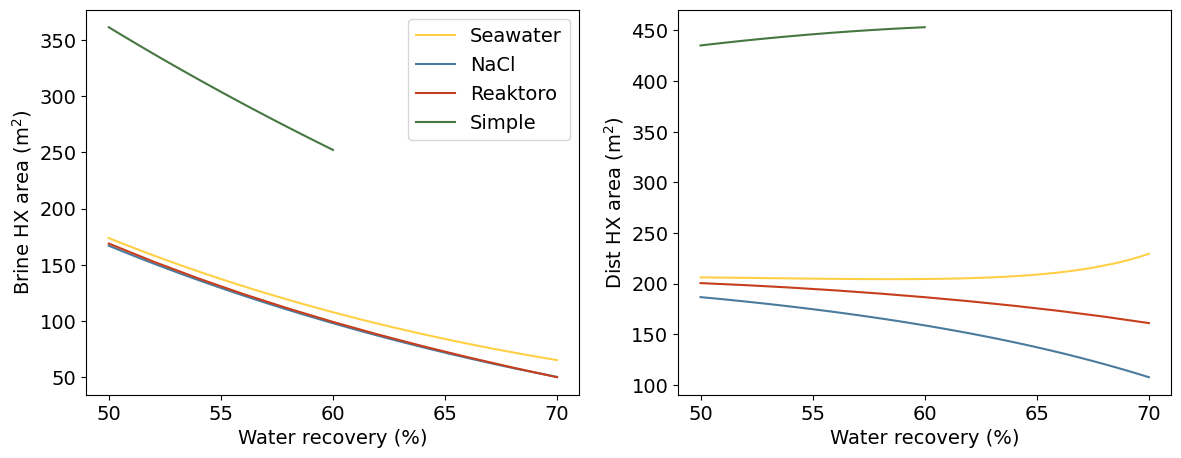

In [34]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(3.5*4, 2.5*2))

axs[0].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Brine HX area'], color=sea_color)
axs[0].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Brine HX area'], color=nacl_color)
axs[0].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Brine HX area'], color=reaktoro_color)
axs[0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Brine HX area'], color=simple_color)

axs[0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0].set_ylabel("Brine HX area (m$^{2}$)", fontsize=title_size)


axs[1].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Dist HX area'], color=sea_color)
axs[1].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Dist HX area'], color=nacl_color)
axs[1].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Dist HX area'], color=reaktoro_color)
axs[1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Dist HX area'], color=simple_color)

axs[1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1].set_ylabel("Dist HX area (m$^{2}$)", fontsize=title_size)

axs[0].legend(["Seawater","NaCl","Reaktoro","Simple"],loc="upper right",fontsize=title_size)

fig.savefig("MVC_comparison_HX")